In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tit = pd.read_csv('train.csv')
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


KeyError: 'Name'

In [59]:
x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
4,5,0,3,35.0,0,0,8.0500,1,0,1
5,6,0,3,24.0,0,0,8.4583,1,1,0
6,7,0,1,54.0,0,0,51.8625,1,0,1
7,8,0,3,2.0,3,1,21.0750,1,0,1
8,9,1,3,27.0,0,2,11.1333,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,24.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [3]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


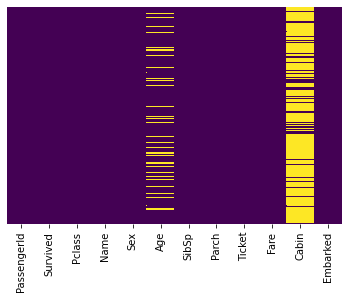

In [4]:
sns.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
# as there we can see lots of data is missing in cabin colums so we can ignore that 
# AND FOR AGE WE CAN IMPLANT AVG IN ALL NAN 

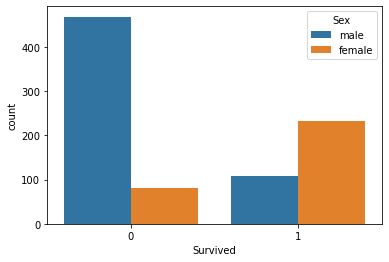

In [6]:
sns.countplot(x='Survived',hue='Sex',data = tit)

In [7]:
#we can see the number of female survived is more then the male and ratio is better.

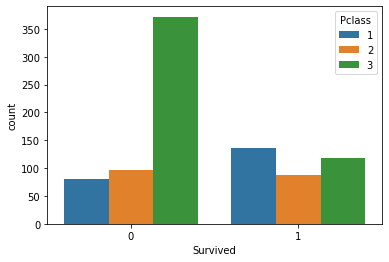

In [8]:
sns.countplot(x='Survived',hue='Pclass',data = tit)

In [9]:
# we can see that the number of surviver is more from 1st class and least of 3rd class

In [10]:
import cufflinks as cf
cf.go_offline()

In [11]:
tit['Fare'].iplot(kind='hist',bins=30,color='green')

In [12]:
# data cleaning
# we need to visualize two sector which we came accross while watching heatmap above 

In [13]:
# we will see the box plot of age according to class and putting the avg age according to the class so that we can have much accuracy in our model

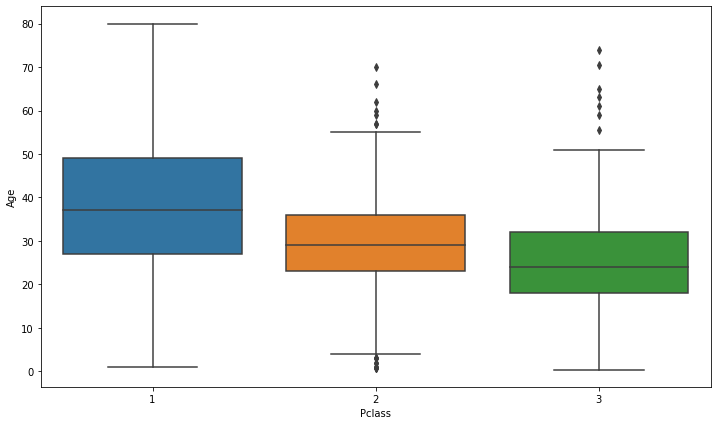

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age', data=tit)

# as we can see pclass of 1st having avg age of 37 2nd class 29 and for 3rd class 24

In [15]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


applying the function

In [17]:
tit['Age'] = tit[['Age', 'Pclass']].apply(impute_age,axis =1)

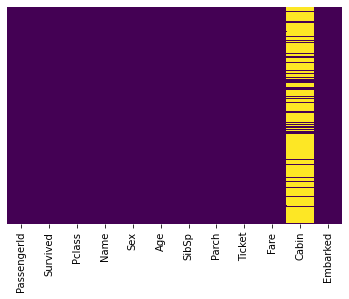

In [21]:
sns.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [24]:
# droping cabin columns

In [22]:
tit.drop('Cabin',axis=1,inplace =True)

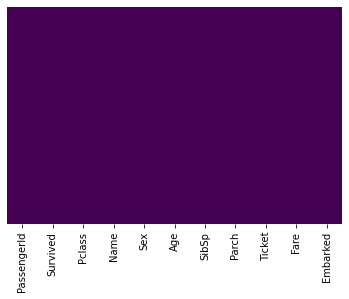

In [23]:
sns.heatmap(tit.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [27]:
tit.dropna(inplace = True)

In [28]:
#we need categorica features to dummy variables using pandas

In [31]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [34]:
sex = pd.get_dummies(tit['Sex'],drop_first=True)
embark = pd.get_dummies(tit['Embarked'],drop_first=True)

In [35]:
tit.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [37]:
tit.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace =True)

In [38]:
tit.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [39]:
tit = pd.concat([tit,sex,embark],axis = 1)

In [40]:
tit.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
#Building Logistic Regression Model

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
 X_train, X_test, y_train, y_test = train_test_split(tit.drop('Survived',axis =1),tit['Survived'], test_size=0.30, random_state=42)

In [45]:
#we will now train and the we predict

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\AMITT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [48]:
prediction = logmodel.predict(X_test)

In [49]:
#evalution

In [51]:
from sklearn.metrics import classification_report

In [52]:
print (classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       167
           1       0.74      0.70      0.72       100

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.78       267
weighted avg       0.80      0.80      0.80       267

